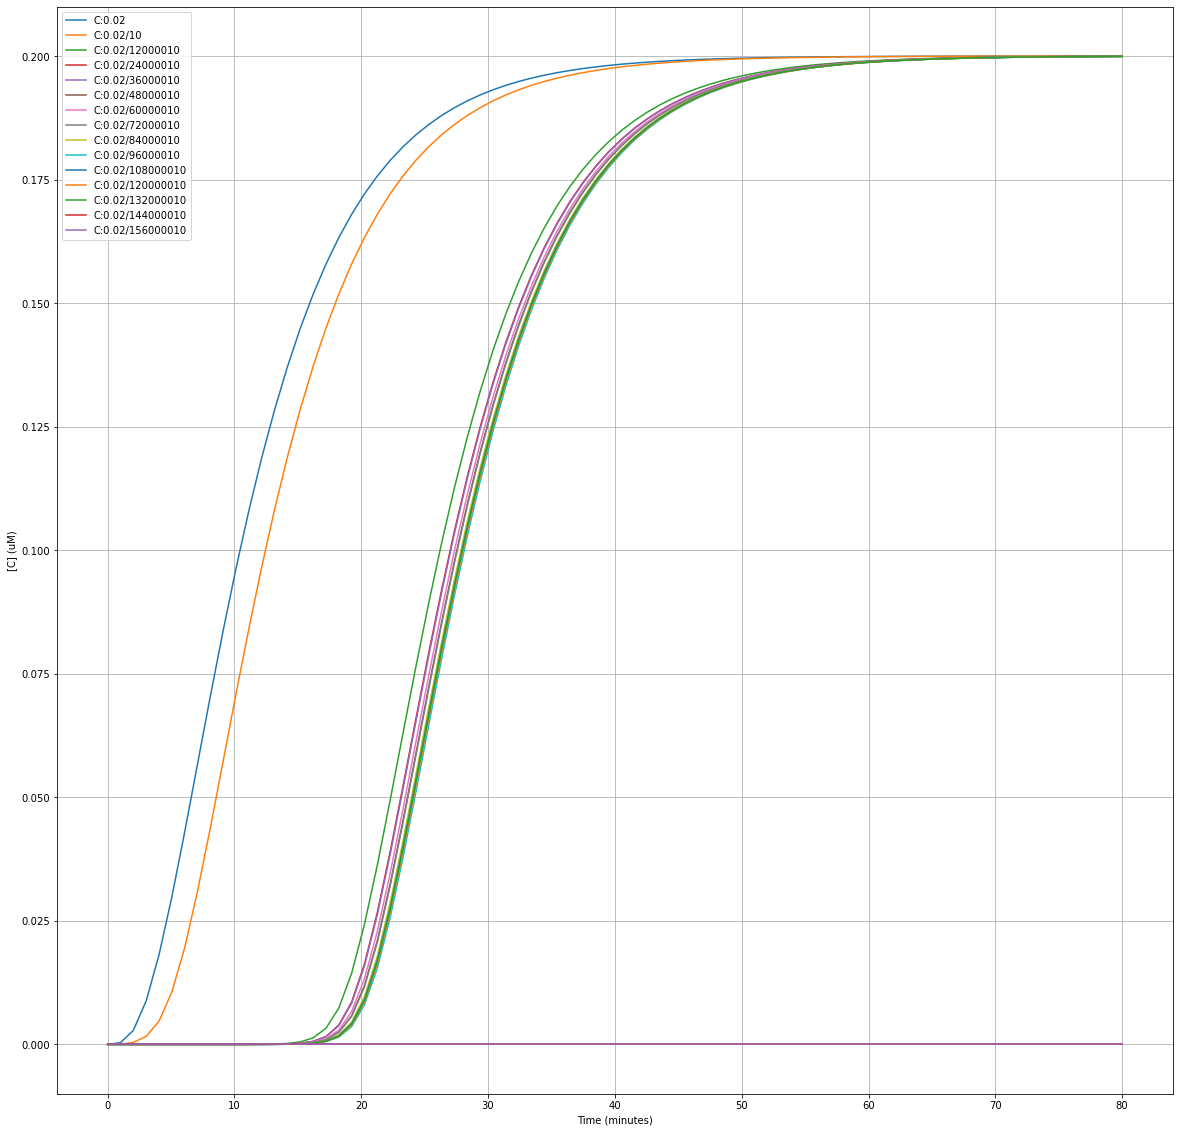

In [32]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt


# Catalyst + HC -> CHC (k0)
# CHC + H1 -> CH1 (k1)
# H2 + CH1 -> CH1H2 + Catalyst (k2)
# CH1CH2 +RP-> RF+ RQ (k3)


#function to solve differential equations of the system
def cha(y, t, k0, k1, k2, k3):
    ca, hc, chc, h1, ch1, h2, ch1h2, rp, rf = y
    dydt =  [-k0*ca*hc+k2*h2*ch1, -k0*ca*hc, k0*ca*hc, -k1*h1*chc, k1*h1*chc, -k2*h2*ch1, k2*h2*ch1, -k3*ch1h2*rp, k3*ch1h2*rp]
    return dydt

#Plottingfunction
def plottingfunction(y0,t,cha):
    for i in range(10,160000000+1,12000000):
        y=[0.02/i, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0]
        soli = odeint(cha, y, t, args=(49.90000000000014, 26.300000000000033, 1.0, 0.7000000000000001))
        lrfi="C:0.02/"+str(i)
        plt.plot(t, soli[:, 8], label = lrfi)

#Set the initial concentration [ca, hc, chc, h1, ch1, h2, ch1h2, rp, rf]
y0=[0.02, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0]
y1=[0.01, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0]

#Set time scale
t = np.linspace(0, 80, 80)

#Label for graphs
lca = "CAT(t)"
lh1 = "H1(t)"
lch1 = "CH1(t)"
xla = "Time (minutes)"
yla = "[C] (uM)"
lh2 = "H2(t)"
lch1h2 = "CH1H2(t)"
lrp = "RP(t)"
lrf = "C:0.02"

#Plottingbaseconcentrationcase
sol = odeint(cha, y0, t, args=(49.90000000000014, 26.300000000000033, 1.0, 0.7000000000000001))
plt.figure(figsize=(20,20))
plt.plot(t, sol[:, 8], label = lrf)
plt.xlabel(xla)
plt.ylabel(yla)
plt.grid()


#callplottingfunction
plottingfunction(y0,t,cha)
plt.legend(loc='best')
plt.savefig("ModelPLot2.pdf")
plt.show()


